# A Plot of $H_R$ vs. $H_0$

Yates et al. make the statement that they can construct a new acidity function, $H_S$, for ester protonation by determing a proportionality factor w.r.t. $H_0$. As evidence that the factor will hold across a range of $H_0$, they plot several acidity functions against $H_0$. Since we have the data for $H_R$ and $H_0$, let us plot this relationship for ourselves.

In [4]:
### IMPORTANT: RUN THE CODE BLOCK AT THE END OF THIS NOTEBOOK TO LOAD THE INTERPOLATION LIBRARY

##############################################################
### Set up libraries and global variables
##############################################################

H0_Data_File_Name = "02_H0_H2SO4_Tickle_1970.csv"

HR_Data_File_Name = "04_Deno_1955_HR_Values.csv"
#HR_Data_File_Name = "04_Cook_1975_HR_Values.csv"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit
from scipy.stats import linregress

from statsmodels.nonparametric.smoothers_lowess import lowess     # A function for interpolating a plot using the locally weighed scatterplot smoothing method. Returns smoothed x,y points
from scipy.interpolate import CubicSpline                         # A function for interpolating a plot using the cubic spline method. Returns an interpolation function.
from scipy.interpolate import interp1d                            # A function for interpolating a plot using the connect-the-dots method. Returns an interpolation function.
from scipy.interpolate import make_smoothing_spline               # A function for interpolating a plot using a Bspline algorithm. Returns an interpolation function.

from matplotlib.patches import PathPatch
from matplotlib.path import Path


#github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_30/data/"
github_location = "./data/"
github_H0_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_08/data/H0_data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_styles = "./styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

molwtH2SO4 = 98.08
molwtH20 = 18.0
densityH2SO4 = 1.83
densityH2O = 1.000

### interpolation = interp1d(x1, y1, kind='linear')
### interpolation = CubicSpline(x1, y1)
### interpolation = scipy.interpolate.make_smoothing_spline(x1, y1, w=None, lam=0.03)



In [5]:
##############################################################
### Import the data and perform calculations
##############################################################

Filename = github_location + H0_Data_File_Name

dfH0 = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 

Filename = github_location + HR_Data_File_Name

dfHR = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 


#display(dfH0.head()); display(dfH0.tail())
#display(dfHR.head()); display(dfHR.tail())

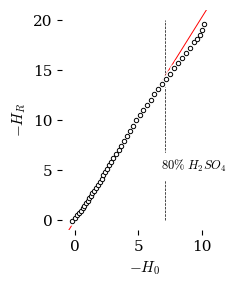

In [ ]:
##################################################
### Apply interpolation function to get HR at the same concentrations as were used in the H0 data
##################################################

interpolator = MakeInterpolationFunctionForHRinH2SO4byPercentWt()
x = -dfH0["H0"]
dfH0["HR"] = interpolator(dfH0["%H2SO4"])
y = -dfH0["HR"]


###################################################
### Set up labels for plots
###################################################

x_label = r"$-H_0$"
y_label = r"$-H_R$"

Title = "$H_R$ vs. $H_0$"

###################################################
### Create figure for plot
###################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2.5,3)) 

###################################################
### Make the plot
###################################################

ax.set(
#          title = Title,       
          ylabel=y_label, 
          xlabel=x_label,                
          xlim=[-1,12],                  
          ylim=[-1,21]
       )
ax.margins(x=.07, y=.07, tight=True)



ax.scatter(x, y, 
             marker = "o", 
             s = 30, 
             color = "white", 
             linewidths=0.7, 
             zorder = 2)
ax.scatter(x, y, 
             marker = "o", 
             s = 10, 
             color = "white", 
             edgecolors = "black", 
             linewidths=0.7, 
             zorder = 2)


#ax.plot(x, y, "-", color = "black", linewidth=0.7, zorder = 1)
#ax.plot(x_smooth, y_smooth, "-", color = "black", linewidth=0.7, zorder = 1)

###################################################
### Linear regression through zero
###################################################

df2 = dfH0.loc[(-dfH0["H0"])<7]   # Plot only points below -H0 = 7

x2 = -df2["H0"]
y2 = -df2["HR"]

def func(x, slope):
       y = x*slope
       return(y)

popt, pcov = curve_fit(func, x2, y2)
slope = popt[0]

x1 = np.arange(-2, 20, 1)
y1 = x1 * slope


#fit = linregress(x,y)
#y1 = x*fit.slope + fit.intercept
ax.plot(x1, y1, "-", color = "white", linewidth=2, zorder = 0)
ax.plot(x1, y1, "-", color = "red", linewidth=0.7, zorder = 0)

ax.vlines(7.1,0,20, linestyle="--", color = "black", linewidth=0.5, zorder = 0)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 9,
        }

plt.text(6.8,5, r"$80\%~H_2SO_4$", fontdict=font, bbox=dict(facecolor='white', edgecolor = 'white', alpha=1))

plt.savefig("plots/01_F5_H0HrCorrelation.pdf")
plt.show()

# RUN THE CODE BELOW FIRST

In [1]:
### IMPORTANT: RUN THIS CODE BLOCK TO LOAD THE INTERPOLATION LIBRARY

###################################################
### Interpolator Functions
###################################################


###################################################
### Create Interpolation Function for H0 from %H2SO4 from Tickle
###################################################

### This function below could be in an external library that you call in your own program.

import pandas as pd
import numpy as np
from scipy.interpolate import make_smoothing_spline               # A function for interpolating a plot using a Bspline algorithm. Returns an interpolation function.

#github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_30/data/"
github_location = "./data/"


def MakeInterpolationFunctionForH0inH2SO4byPercentWt():
    Data_File_Name = "02_H0_H2SO4_Tickle_1970.csv"

    Filename = github_location + Data_File_Name
    
    df = pd.read_csv(Filename, 
                     delimiter = ",", 
                     skipinitialspace=True, 
                     comment = "#") 
    
    x = df["%H2SO4"]
    y = df["H0"]
    
    interpolation = make_smoothing_spline(x, y,      ### The x and y data
                                          w=None,    ### A list of weights for each point (default = None)
                                          lam=0.1)   ### A factor for the degree of smoothing. Change this to change the smoothness.
    
    return(interpolation)


###################################################
### Create Interpolation Function for HR from %H2SO4
###################################################

### This function below could be in an external library that you call in your own program.

def MakeInterpolationFunctionForHRinH2SO4byPercentWt():
    Data_File_Name = "04_Deno_1955_HR_Values.csv"
#    Data_File_Name = "04_Cook_1975_HR_Values.csv"

    Filename = github_location + Data_File_Name
    
    df = pd.read_csv(Filename, 
                     delimiter = ",", 
                     skipinitialspace=True, 
                     comment = "#") 
    
    
    x = df["%H2SO4"]
    y = df["HR"]
    
    interpolation = make_smoothing_spline(x, y,      ### The x and y data
                                          w=None,    ### A list of weights for each point (default = None)
                                          lam=0.1)  ### A factor for the degree of smoothing. Change this to change the smoothness.
    
    return(interpolation)


###################################################
### Create Interpolation Function for a_H2O by X_H2SO4
###################################################

# The activity of water in 0.01 mole fraction H2SO4 is 0.983

### This function below could be in an external library that you call in your own program.

def MakeInterpolationFunctionForH2OActivityinH2SO4byMoleFraction():
    Data_File_Name = "01_Giauque_Table9_activityH2OinH2SO4.csv"
    
    molwtH2SO4 = 98.08; molwtH20 = 18.0; densityH2SO4 = 1.83; densityH2O = 1.000
    
    Filename = github_location + Data_File_Name
    
    df1 = pd.read_csv(Filename, 
                     delimiter = ",", 
                     skipinitialspace=True, 
                     comment = "#") 
    
    molal = df1["conc H2SO4 / m"]
    mass_add_to_1_kg_water = molal * molwtH2SO4
    total_mass_solution = mass_add_to_1_kg_water + 1000
    percent_H2SO4 = mass_add_to_1_kg_water / total_mass_solution * 100
    
    df1["%H2SO4"] = percent_H2SO4
    df1["mole fraction"] = molal / (molal + 1000/molwtH20)
    
    x = df1["mole fraction"]
    y = df1["aH2O"]


    
    interpolation = make_smoothing_spline(x, y,      ### The x and y data
                                          w=None,    ### A list of weights for each point (default = None)
                                          lam=0)     ### A factor for the degree of smoothing. Change this to change the smoothness.
    
    return(interpolation)


###################################################
### Create Interpolation Function for a_H2O by % H2SO4
###################################################

# The activity of water in 10% H2SO4 is 0.956

### This function below could be in an external library that you call in your own program.

def MakeInterpolationFunctionForH2OActivityinH2SO4byPercentWt():


    Data_File_Name = "01_Giauque_Table9_activityH2OinH2SO4.csv"

    molwtH2SO4 = 98.08; molwtH20 = 18.0; densityH2SO4 = 1.83; densityH2O = 1.000
    
    Filename = github_location + Data_File_Name
    
    df1 = pd.read_csv(Filename, 
                     delimiter = ",", 
                     skipinitialspace=True, 
                     comment = "#") 
    
    molal = df1["conc H2SO4 / m"]
    mass_add_to_1_kg_water = molal * molwtH2SO4
    total_mass_solution = mass_add_to_1_kg_water + 1000
    percent_H2SO4 = mass_add_to_1_kg_water / total_mass_solution * 100
    
    df1["%H2SO4"] = percent_H2SO4
    df1["mole fraction"] = molal / (molal + 1000/molwtH20)

    x = df1["%H2SO4"]
    y = df1["aH2O"]
    
    interpolation = make_smoothing_spline(x, y,      ### The x and y data
                                          w=None,    ### A list of weights for each point (default = None)
                                          lam=0.03)  ### A factor for the degree of smoothing. Change this to change the smoothness.
    
    return(interpolation)


###################################################
### Create Interpolation Function for Density from %H2SO4
###################################################

# The Density of 100% H2SO4 is 1.831

### This function below could be in an external library that you call in your own program.

def MakeInterpolationFunctionForDensityofH2SO4byPercentWt():
    Data_File_Name = "03_H2SO4_PercentWt_to_MolarConc_CRC.csv"

    Filename = github_location + Data_File_Name
    
    df = pd.read_csv(Filename, 
                     delimiter = ",", 
                     skipinitialspace=True, 
                     comment = "#") 
    
    y = df['Density']
    x = df['%H2SO4']
    
    interpolation = make_smoothing_spline(x, y,     ### The x and y data
                                          w=None,   ### A list of weights for each point (default = None)
                                          lam=0.1)  ### A factor for the degree of smoothing. Change this to change the smoothness.

    return(interpolation)




###################################################
### Switcher function
###################################################


# This code runs only in python 3.10 or above versions
def select_interpolator(parameter):
    match parameter:
        case "H0":
            return MakeInterpolationFunctionForH0inH2SO4byPercentWt()
        case "HR":
            return MakeInterpolationFunctionForHRinH2SO4byPercentWt()
        case "aH2O":
            return MakeInterpolationFunctionForH2OActivityinH2SO4byPercentWt()
        case "Density":
            return MakeInterpolationFunctionForDensityofH2SO4byPercentWt()
        case default:
            return "FAIL"
